In [3]:
!pip install pandas numpy matplotlib yfinance PyPortfolioOpt
import os
if not os.path.isdir('data'):
    os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
    os.chdir('PyPortfolioOpt/cookbook')

fatal: destination path 'PyPortfolioOpt' already exists and is not an empty directory.


In [88]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import hvplot.pandas
import plotly.express as px
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import  risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

In [89]:
tickers = ["TSLA", "BIDU", "NVDA", "AAL", "PYPL", "UBER", "DIS", "DHR", "PANW","FWONK","MCL.CN","FI"]

In [90]:
portfolio_creation_date = "2023-11-07"
portfolio_rebalance_date = "2023-11-10"

In [91]:
stock_data = yf.download(tickers, period="10y")

[*********************100%%**********************]  12 of 12 completed


In [92]:
prices = pd.DataFrame(stock_data["Adj Close"].dropna(how="all"))
prices

,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
Date,,,,,,,,,,,,
2013-11-11,21.937595,151.600006,47.235798,62.127396,26.344999,NaN,0.020,3.681016,13.956667,NaN,9.646667,NaN
2013-11-12,22.173283,150.429993,46.943581,61.609219,26.407499,NaN,0.020,3.688054,13.760000,NaN,9.186667,NaN
2013-11-13,21.975304,152.979996,46.854645,62.700150,26.797501,NaN,0.020,3.788937,13.816667,NaN,9.246667,NaN
2013-11-14,22.305265,158.990005,47.286602,63.654686,26.799999,NaN,0.020,3.805360,14.066667,NaN,9.173333,NaN
2013-11-15,22.522097,162.330002,47.318363,63.636497,27.152500,NaN,0.020,3.793628,15.236667,NaN,9.030000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06,11.660000,108.400002,195.520004,84.019997,119.639999,64.980003,0.075,457.510010,237.000000,54.619999,219.270004,48.139999
2023-11-07,11.750000,108.010002,198.250000,84.589996,119.209999,64.199997,0.075,459.549988,242.080002,54.630001,222.179993,49.919998
2023-11-08,12.010000,107.419998,196.820007,84.500000,120.129997,66.000000,0.075,465.739990,241.080002,55.080002,222.110001,49.500000


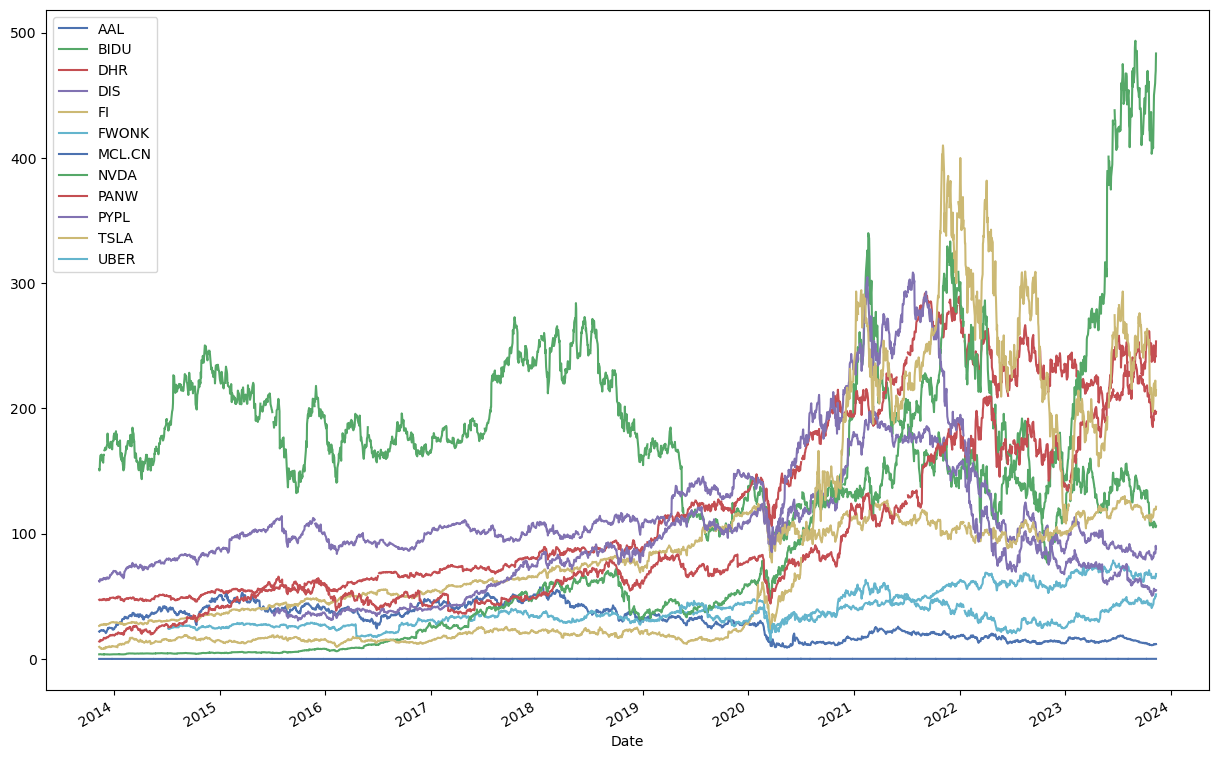

In [93]:
prices[prices.index >= "2013-01-01"].plot(figsize=(15,10));

In [94]:
sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
AAL,0.250129,0.057065,0.025572,0.060192,0.043070,0.053297,-0.010131,0.067418,0.047138,0.055525,0.070897,0.136837
BIDU,0.057065,0.195225,0.029801,0.036733,0.034255,0.039794,0.006030,0.074729,0.049499,0.067526,0.082206,0.114925
DHR,0.025572,0.029801,0.051609,0.023223,0.027599,0.025628,0.004990,0.046179,0.031619,0.043046,0.037866,0.049614
DIS,0.060192,0.036733,0.023223,0.072530,0.035074,0.039636,0.005948,0.046280,0.036407,0.047855,0.044223,0.089460
FI,0.043070,0.034255,0.027599,0.035074,0.061500,0.036906,-0.004719,0.047749,0.032078,0.051705,0.043439,0.075122
FWONK,0.053297,0.039794,0.025628,0.039636,0.036906,0.118775,-0.001111,0.054696,0.040191,0.045220,0.051234,0.086901
MCL.CN,-0.010131,0.006030,0.004990,0.005948,-0.004719,-0.001111,3.539416,0.000147,-0.015147,0.005855,0.009567,0.028637
NVDA,0.067418,0.074729,0.046179,0.046280,0.047749,0.054696,0.000147,0.210862,0.071821,0.095819,0.105876,0.136611
PANW,0.047138,0.049499,0.031619,0.036407,0.032078,0.040191,-0.015147,0.071821,0.147578,0.062948,0.075733,0.090761
PYPL,0.055525,0.067526,0.043046,0.047855,0.051705,0.045220,0.005855,0.095819,0.062948,0.146355,0.088910,0.117921


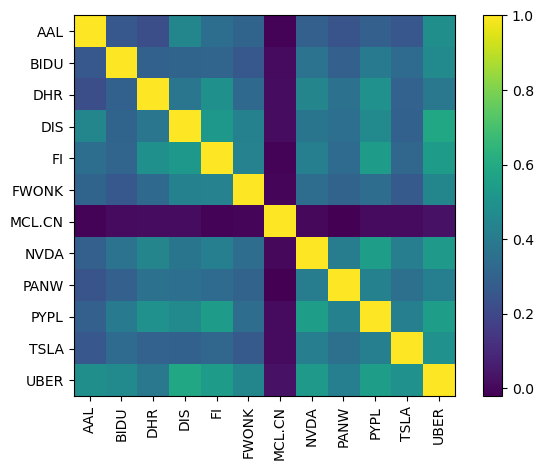

In [95]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

In [96]:
mu = expected_returns.capm_return(prices)
mu

AAL       0.304824
BIDU      0.284365
DHR       0.154015
DIS       0.196279
FI        0.179240
FWONK     0.219508
MCL.CN    1.422202
NVDA      0.339775
PANW      0.247934
PYPL      0.302835
TSLA      0.379626
UBER      0.520483
Name: mkt, dtype: float64

In [97]:
# Use hvplot.bar to create bar plot with categorical data
bar_chart=pd.DataFrame(mu)

bar_chart

,mkt
AAL,0.304824
BIDU,0.284365
DHR,0.154015
DIS,0.196279
FI,0.179240
FWONK,0.219508
MCL.CN,1.422202
NVDA,0.339775
PANW,0.247934
PYPL,0.302835


In [98]:
bar_chart.hvplot.bar(
    x="index", 
    y="mkt", 
    color="green",
    xlabel="Ticker", 
    ylabel="Daily Return", 
    title="Daily Return",
    rot=90
)

:Bars   [index]   (mkt)

Portfolio Allocation


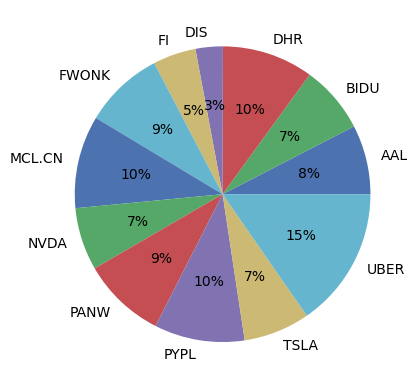

In [99]:
ef = EfficientFrontier(mu,sample_cov)
weights = ef.max_sharpe() #for maximizing the Sharpe ratio #Optimization
cleaned_weights = ef.clean_weights() #to clean the raw weights
# Get the Keys and store them in a list
labels = list(cleaned_weights.keys())
# Get the Values and store them in a list
values = list(cleaned_weights.values())
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.0f%%')
print('Portfolio Allocation')
plt.show(fig)

In [100]:
cleaned_weights

OrderedDict([('AAL', 0.07584),
             ('BIDU', 0.07394),
             ('DHR', 0.09986),
             ('DIS', 0.02986),
             ('FI', 0.04703),
             ('FWONK', 0.08725),
             ('MCL.CN', 0.10136),
             ('NVDA', 0.06854),
             ('PANW', 0.09143),
             ('PYPL', 0.09881),
             ('TSLA', 0.07257),
             ('UBER', 0.1535)])

In [101]:
latest_prices = prices.iloc[-1] #prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=100000)
alloc, leftover = da.lp_portfolio(verbose=True)
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Funds remaining: 691.64
AAL: allocated 0.000, desired 0.076
BIDU: allocated 0.080, desired 0.074
DHR: allocated 0.107, desired 0.100
DIS: allocated 0.036, desired 0.030
FI: allocated 0.053, desired 0.047
FWONK: allocated 0.094, desired 0.087
MCL.CN: allocated 0.110, desired 0.101
NVDA: allocated 0.073, desired 0.069
PANW: allocated 0.100, desired 0.091
PYPL: allocated 0.106, desired 0.099
TSLA: allocated 0.080, desired 0.073
UBER: allocated 0.162, desired 0.153
Allocation has RMSE: 0.023
Discrete allocation performed with $691.64 leftover


/Users/sosadiazgiron/anaconda3/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


{'BIDU': 75,
 'DHR': 54,
 'DIS': 41,
 'FI': 43,
 'FWONK': 138,
 'MCL.CN': 145082,
 'NVDA': 15,
 'PANW': 39,
 'PYPL': 192,
 'TSLA': 37,
 'UBER': 311}

In [102]:
ef.portfolio_performance(verbose=True);

Expected annual return: 42.0%
Annual volatility: 32.2%
Sharpe Ratio: 1.24


In [103]:
idx = pd.date_range( start='2013-01-01',end='2023-11-09', freq='M')

stock_data_pctchange = prices.pct_change().cumsum()

stock_data_pctchange.dropna(how="all")


,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
Date,,,,,,,,,,,,
2013-11-12,0.010744,-0.007718,-0.006186,-0.008341,0.002372,NaN,0.000000,0.001912,-0.014091,NaN,-0.047685,NaN
2013-11-13,0.001815,0.009234,-0.008081,0.009367,0.017141,NaN,0.000000,0.029266,-0.009973,NaN,-0.041154,NaN
2013-11-14,0.016830,0.048520,0.001138,0.024591,0.017234,NaN,0.000000,0.033600,0.008121,NaN,-0.049084,NaN
2013-11-15,0.026551,0.069527,0.001810,0.024305,0.030387,NaN,0.000000,0.030517,0.091296,NaN,-0.064709,NaN
2013-11-18,0.047899,0.072854,0.002616,0.017162,0.038490,NaN,0.000000,0.006399,0.063731,NaN,-0.167109,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06,0.614484,0.638345,1.682627,0.667166,1.827316,1.575387,16.760397,5.886137,3.586429,1.023848,4.685739,0.856032
2023-11-07,0.622203,0.634747,1.696589,0.673950,1.823722,1.563384,16.760397,5.890596,3.607864,1.024031,4.699011,0.893007
2023-11-08,0.644330,0.629285,1.689376,0.672886,1.831440,1.591421,16.760397,5.904066,3.603733,1.032268,4.698696,0.884594


In [104]:
stock_data_pctchange.columns

Index(['AAL', 'BIDU', 'DHR', 'DIS', 'FI', 'FWONK', 'MCL.CN', 'NVDA', 'PANW',
       'PYPL', 'TSLA', 'UBER'],
      dtype='object')

In [105]:
stock_data_pctchange.hvplot.line(
    xlabel="Year", 
    ylabel="Daily Return",
    title="Value"
)

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [106]:
alloc_df = pd.DataFrame(list(alloc.items()), columns=['Stock', 'Value'])
alloc_df

,Stock,Value
0,BIDU,75
1,DHR,54
2,DIS,41
3,FI,43
4,FWONK,138
5,MCL.CN,145082
6,NVDA,15
7,PANW,39
8,PYPL,192
9,TSLA,37


In [107]:
alloc_df_ch = alloc_df.transpose(copy=False) 
alloc_df_ch

,0,1,2,3,4,5,6,7,8,9,10
Stock,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
Value,75,54,41,43,138,145082,15,39,192,37,311


In [108]:
current_values = prices.loc[portfolio_rebalance_date] * alloc_df_ch
current_values

,0,1,2,3,4,5,6,7,8,9,...,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
Stock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
current_values_sum = current_values.sum(axis=1, numeric_only=True)
current_values_sum

Stock    0.0
Value    0.0
dtype: float64

In [110]:
total_value = current_values_sum + leftover
total_value

Stock    691.639319
Value    691.639319
dtype: float64

In [111]:
equal_weights = {'AAL': 0.08333,
             'BIDU': 0.08333,
             'DHR': 0.08333,
             'DIS': 0.08333,
             'FI': 0.08333,
             'FWONK': 0.08333,
             'MCL.CN': 0.08333,
             'NVDA': 0.08333,
             'PANW': 0.08333,
             'PYPL': 0.08333,
             'TSLA': 0.08333,
             'UBER': 0.08333}

print(equal_weights)

{'AAL': 0.08333, 'BIDU': 0.08333, 'DHR': 0.08333, 'DIS': 0.08333, 'FI': 0.08333, 'FWONK': 0.08333, 'MCL.CN': 0.08333, 'NVDA': 0.08333, 'PANW': 0.08333, 'PYPL': 0.08333, 'TSLA': 0.08333, 'UBER': 0.08333}


In [112]:
equal_weights_df = pd.DataFrame(list(equal_weights.items()), columns=['Stock', 'Equal Weights'])
equal_weights_df

,Stock,Equal Weights
0,AAL,0.08333
1,BIDU,0.08333
2,DHR,0.08333
3,DIS,0.08333
4,FI,0.08333
5,FWONK,0.08333
6,MCL.CN,0.08333
7,NVDA,0.08333
8,PANW,0.08333
9,PYPL,0.08333


In [113]:
latest_prices = prices.loc[portfolio_creation_date]  # prices as of the day you are allocating
da_ew = DiscreteAllocation(equal_weights, latest_prices, total_portfolio_value=100000)
alloc_ew, leftover_ew = da_ew.lp_portfolio(verbose=True)
print(f"Discrete allocation performed with ${leftover_ew:.2f} leftover")
alloc_ew

Funds remaining: 328.11
AAL: allocated 0.000, desired 0.083
BIDU: allocated 0.091, desired 0.083
DHR: allocated 0.091, desired 0.083
DIS: allocated 0.091, desired 0.083
FI: allocated 0.091, desired 0.083
FWONK: allocated 0.091, desired 0.083
MCL.CN: allocated 0.090, desired 0.083
NVDA: allocated 0.092, desired 0.083
PANW: allocated 0.090, desired 0.083
PYPL: allocated 0.090, desired 0.083
TSLA: allocated 0.091, desired 0.083
UBER: allocated 0.091, desired 0.083
Allocation has RMSE: 0.025
Discrete allocation performed with $328.11 leftover


/Users/sosadiazgiron/anaconda3/lib/python3.11/site-packages/cvxpy/problems/problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


{'BIDU': 84,
 'DHR': 46,
 'DIS': 107,
 'FI': 76,
 'FWONK': 141,
 'MCL.CN': 120126,
 'NVDA': 20,
 'PANW': 37,
 'PYPL': 165,
 'TSLA': 41,
 'UBER': 181}

In [114]:
alloc_ew_df = pd.DataFrame(list(alloc_ew.items()), columns=['Stock', 'Alloc Equal Weights'])
alloc_ew_df

,Stock,Alloc Equal Weights
0,BIDU,84
1,DHR,46
2,DIS,107
3,FI,76
4,FWONK,141
5,MCL.CN,120126
6,NVDA,20
7,PANW,37
8,PYPL,165
9,TSLA,41


In [115]:
alloc_ew_df_ch = alloc_ew_df.transpose(copy=False) 
alloc_ew_df_ch

,0,1,2,3,4,5,6,7,8,9,10
Stock,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
Alloc Equal Weights,84,46,107,76,141,120126,20,37,165,41,181


In [116]:
current_values_ew = prices.loc[portfolio_rebalance_date] * alloc_ew_df_ch
current_values_ew

,0,1,2,3,4,5,6,7,8,9,...,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
Stock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alloc Equal Weights,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
current_values_ew_sum = current_values_ew.sum(axis=1, numeric_only=True)
current_values_ew_sum

Stock                  0.0
Alloc Equal Weights    0.0
dtype: float64

In [118]:
total_value_ew = current_values_ew_sum + leftover_ew
total_value_ew

Stock                  328.110976
Alloc Equal Weights    328.110976
dtype: float64

In [119]:
combined_returns_ew = prices.pct_change()
combined_returns_ew

,AAL,BIDU,DHR,DIS,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,TSLA,UBER
Date,,,,,,,,,,,,
2013-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-12,0.010744,-0.007718,-0.006186,-0.008341,0.002372,NaN,0.0,0.001912,-0.014091,NaN,-0.047685,NaN
2013-11-13,-0.008929,0.016951,-0.001895,0.017707,0.014769,NaN,0.0,0.027354,0.004118,NaN,0.006531,NaN
2013-11-14,0.015015,0.039286,0.009219,0.015224,0.000093,NaN,0.0,0.004334,0.018094,NaN,-0.007931,NaN
2013-11-15,0.009721,0.021008,0.000672,-0.000286,0.013153,NaN,0.0,-0.003083,0.083175,NaN,-0.015625,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-06,-0.026711,-0.011490,-0.011876,-0.012343,0.000837,-0.003833,0.0,0.016576,-0.026814,-0.026381,-0.003137,0.008168
2023-11-07,0.007719,-0.003598,0.013963,0.006784,-0.003594,-0.012004,0.0,0.004459,0.021435,0.000183,0.013271,0.036975
2023-11-08,0.022128,-0.005462,-0.007213,-0.001064,0.007717,0.028037,0.0,0.013470,-0.004131,0.008237,-0.000315,-0.008413


In [120]:
portfolio_returns_ew = combined_returns_ew.mul(equal_weights_df)
portfolio_returns_ew

,AAL,BIDU,DHR,DIS,Equal Weights,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,Stock,TSLA,UBER
2013-11-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [124]:
cumulative_returns = (1 + portfolio_returns_ew).cumprod()*100
cumulative_returns

,AAL,BIDU,DHR,DIS,Equal Weights,FI,FWONK,MCL.CN,NVDA,PANW,PYPL,Stock,TSLA,UBER
2013-11-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-11-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


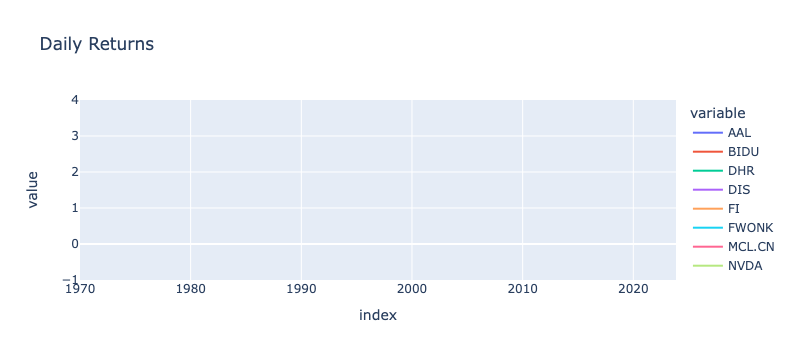

In [134]:
fig = px.line(cumulative_returns[['AAL', 'BIDU', 'DHR', 'DIS', 'FI', 'FWONK', 'MCL.CN', 'NVDA', 'PANW', 'PYPL',  'TSLA', 'UBER']], title='Daily Returns')
fig.show()



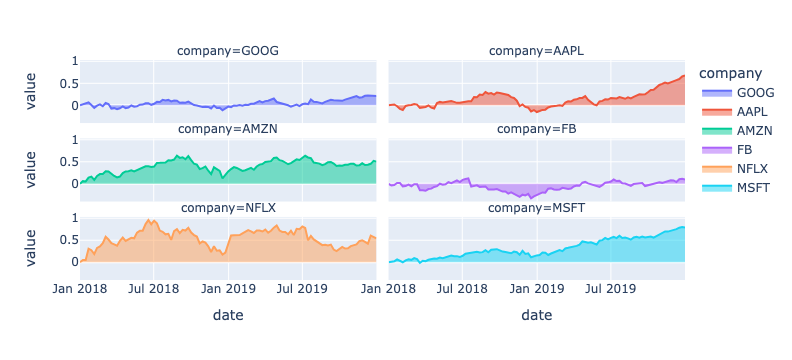

In [142]:
cumulative_returns = px.data.stocks(indexed=True)-1
fig = px.area(cumulative_returns, facet_col="company", facet_col_wrap=2)
fig.show()


##have to figure out how to get our stocks to show here